In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data
import seaborn as sns
import numpy as np

# Data Acqusition Exercises

### Exercise 1
- Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
iris = sns.load_dataset('iris')
df_iris = pd.DataFrame(iris)

- A) print the first 3 rows

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


- B) print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

- C) print the column names

In [5]:
df_iris.columns

#df_iris.columns.to_list()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

- D) print the data type of each column

In [6]:
df_iris.info()
#df_iris.dtypes()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- E) print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


No, I would not recommend rescaling the data based on these statistics.

### Exercise 2
- Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [8]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name = 'Table1_CustDetails')

In [9]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


- A) assign the first 100 rows to a new dataframe, df_excel_sample

In [10]:
df_excel_sample = df_excel.head(100)

In [11]:
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,571.45,No
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,5377.80,No
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,90.45,5957.90,No


- B) print the number of rows of your original dataframe

In [12]:
df_excel.shape[0]

7049

- C) print the first 5 column names

In [13]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

- D) Print the column names that have a data type of object.

In [14]:
df_excel.dtypes[df_excel.dtypes == object]

customer_id     object
gender          object
partner         object
dependents      object
payment_type    object
churn           object
dtype: object

- E) compute the range for each of the numeric variables.

In [15]:
numeric_stats = df_excel.describe().T
numeric_stats['range'] = numeric_stats['max'] - numeric_stats['min']
numeric_stats

,count,mean,std,min,25%,50%,75%,max,range
is_senior_citizen,7049.0,0.162009,0.368485,0.00,0.0000,0.00,0.000,1.00,1.0
phone_service,7049.0,1.324585,0.642709,0.00,1.0000,1.00,2.000,2.00,2.0
internet_service,7049.0,1.222585,0.779068,0.00,1.0000,1.00,2.000,2.00,2.0
contract_type,7049.0,0.690878,0.833757,0.00,0.0000,0.00,1.000,2.00,2.0
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


### Exercise 3

- Read the data from this google sheet into a dataframe, df_google

In [16]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [17]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [18]:
df_google = pd.read_csv(csv_export_url)

- A) print the first 3 rows

In [19]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- B) print the number of rows and columns

In [20]:
df_google.shape

(891, 12)

- C) print the column names

In [21]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- D) print the data type of each column

In [22]:
df_google.info()

#df_google.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- E) print the summary statistics for each of the numeric variables

In [23]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- F) print the unique values for each of your categorical variables


In [24]:
df_google.select_dtypes(object).nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [25]:
df_google.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
df_google.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Data Preparation Exercises

### Exercise 1: Iris Data
- A) Use the function defined in acquire.py to load the iris data.

In [27]:
import acquire

In [28]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


- B) Drop the species_id and measurement_id columns.

In [29]:
cols_to_drop = ['species_id']

iris_df = iris_df.drop(columns = cols_to_drop)
iris_df.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


- C) Rename the species_name column to just species.

In [30]:
iris_df = iris_df.rename(columns = {'species_name': 'species'})
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


- D) Create dummy variables of the species name.

In [31]:
dummy_df = pd.get_dummies(iris_df['species'])
iris_df = pd.concat([iris_df, dummy_df], axis = 1)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


- E) Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [32]:
def prep_iris(df):
    cols_to_drop = ['species_id']
    df = df.drop(columns = cols_to_drop)
    df = df.rename(columns = {'species_name': 'species'})
    
    dummy_df = pd.get_dummies(df['species'])
    df = pd.concat([df, dummy_df], axis = 1)
    return df

In [ ]:
prep_iris(iris_df)

### Exercise 2: Titanic Data
- A) Use the function you defined in acquire.py to load the titanic data set.

In [35]:
import acquire

In [36]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


- B) Handle the missing values in the embark_town and embarked columns.

# Data Exploration Exercises


### Exercise 1: 
- Use the iris dataset. As always, add, commit, and push your changes. Split your data into train, test, and validate samples.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [38]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [39]:
#splitting the dataframe into 2 subjects,
#one group contains the test with .2 of the total,
#while the other contains the train_validate
#random state is constant to ensure repeatable results
#stratify is the subject matter in question

train_validate, test = train_test_split(iris, test_size = .2,
                                       random_state = 123,
                                       stratify = iris.species)

#splitting the train_validate into train and validate,
#the validate group contains .3 of the train_validate data,
#random state is constant to ensure repeatable results,
#stratify is the subject matter in question
train, validate = train_test_split(train_validate, test_size = .3,
                                  random_state = 123,
                                  stratify = train_validate.species)

In [40]:
#printing the shape of the train, vaidate and test dataframes
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (84, 5)
validate -> (36, 5)
test -> (30, 5)


### Exercise 2:
- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [41]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [42]:
#melting the train dataframe using 'species' as the identifying variable,
#melting turns all the other columns into one column called variable,
#with all other values listed in another column
train_melt = train.melt(id_vars = 'species')
train_melt

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


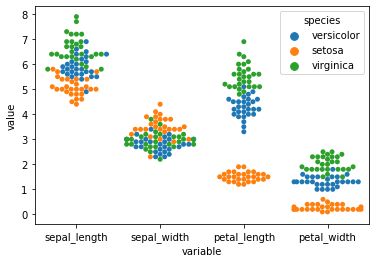

In [43]:
#using the train_melt dataframe to create a swarmplot
sns.swarmplot(data = train_melt, x = 'variable', y = 'value', hue = 'species')
plt.show()

__Takeaways__: 
- There is a fairly clear line in the difference between species petal length and species petal width
- The sepal length and sepal width is not so significant. 
- Sepal width specifically is intertwined within the other species that we would not be able to make any clear conclusions. 

### Exercise 3: 
- Create 4 subplots (2 rows x 2 columns) of scatterplots.
    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length
- What are your takeaways?

In [44]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [45]:
#creating sepal area by multiplying sepal length by sepal width
train['sepal_area'] = round(train.sepal_length * train.sepal_width, 1)
#creating petal are by multiplying petal length by petal width
train['petal_area'] = round(train.petal_length * train.petal_width, 1)
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,14.8,3.5
36,5.5,3.5,1.3,0.2,setosa,19.2,0.3
133,6.3,2.8,5.1,1.5,virginica,17.6,7.6
95,5.7,3.0,4.2,1.2,versicolor,17.1,5.0
18,5.7,3.8,1.7,0.3,setosa,21.7,0.5


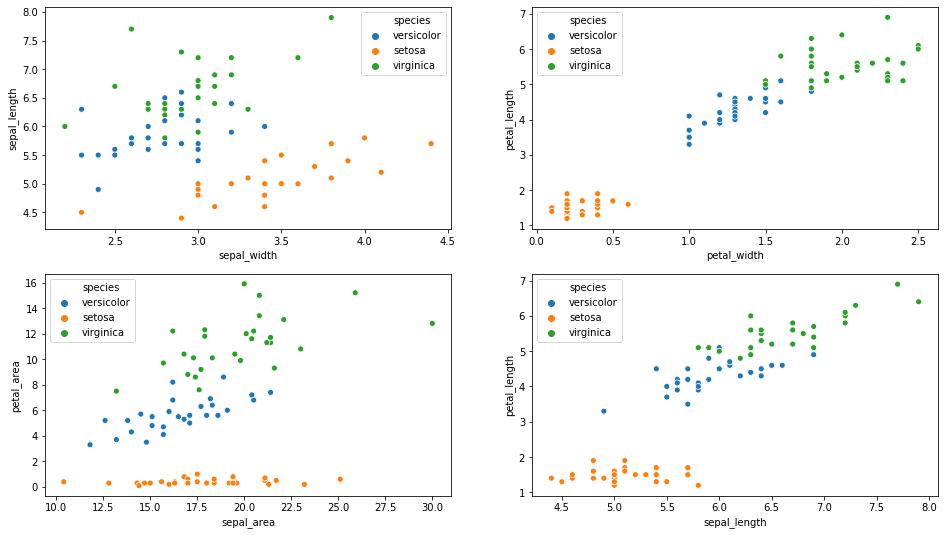

In [46]:
#adjusting the size of the sub-scatterplots
plt.figure(figsize=(16, 9))

#scatterplot 1 
plt.subplot(2, 2, 1)
sns.scatterplot(data = train, x = 'sepal_width', y = 'sepal_length', hue = 'species')

#scatterplot 2
plt.subplot(2, 2, 2)
sns.scatterplot(data = train, x = 'petal_width', y = 'petal_length', hue = 'species')

#scatterplot 3
plt.subplot(2, 2, 3)
sns.scatterplot(data = train, x = 'sepal_area', y = 'petal_area', hue = 'species')

#scatterplot 4
plt.subplot(2, 2, 4)
sns.scatterplot(data = train, x = 'sepal_length', y = 'petal_length', hue = 'species')

plt.show()

__Takeaways__: 

- The scatterplot displaying sepal length vs sepal width does not seem to be a good determing factor for species because of the overlap between versicolor and virginica
- The other scatterplots seem to be a better identifier but there is some edge cases where we may predict versicolor or virginica incorrectly
- Lines can be drawn to distingiush between species on petal measurements than on sepal measurements

### Exercise 4: 
- Create a heatmap of each variable layering correlation coefficient on top.

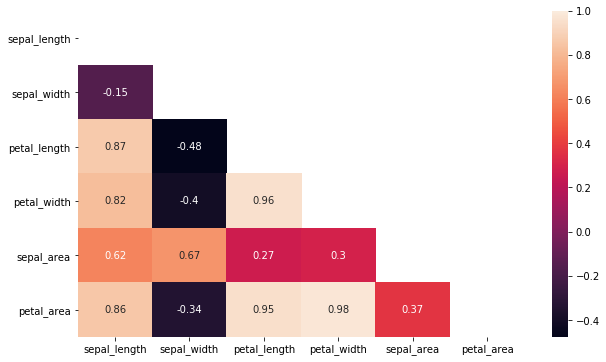

In [47]:
#creating correlation values for the train dataframe
train_corr = train.corr()
#creating a mask for the upper triangle that repeats
mask = np.triu(np.ones_like(train_corr, dtype = bool))
#adjusting the size of the scatterplot
f, ax = plt.subplots(figsize = (10,6))
#creating the heatmap based of the correlation values of train,
#applying the mask,
#and annotating the correlation values respective to the data
sns.heatmap(train_corr, mask = mask, annot = True)
plt.show()

### Exercise 5: 
- Create a scatter matrix visualizing the interaction of each variable

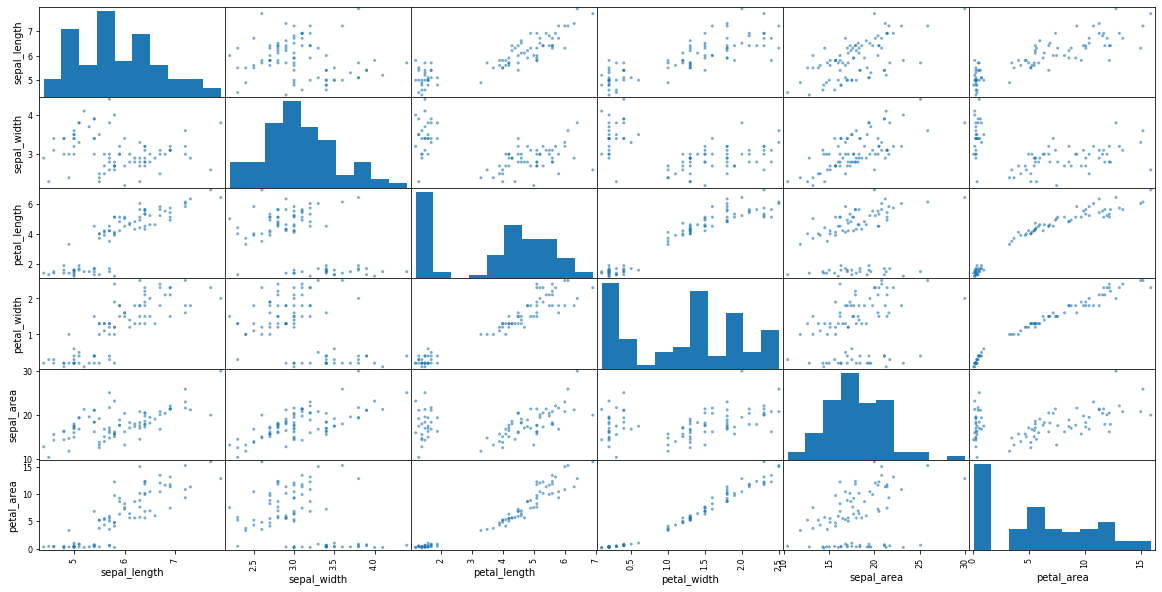

In [48]:
#creating a scatter matrix using pandas
pd.plotting.scatter_matrix(train, figsize = (20, 10), alpha = .6)
plt.show()

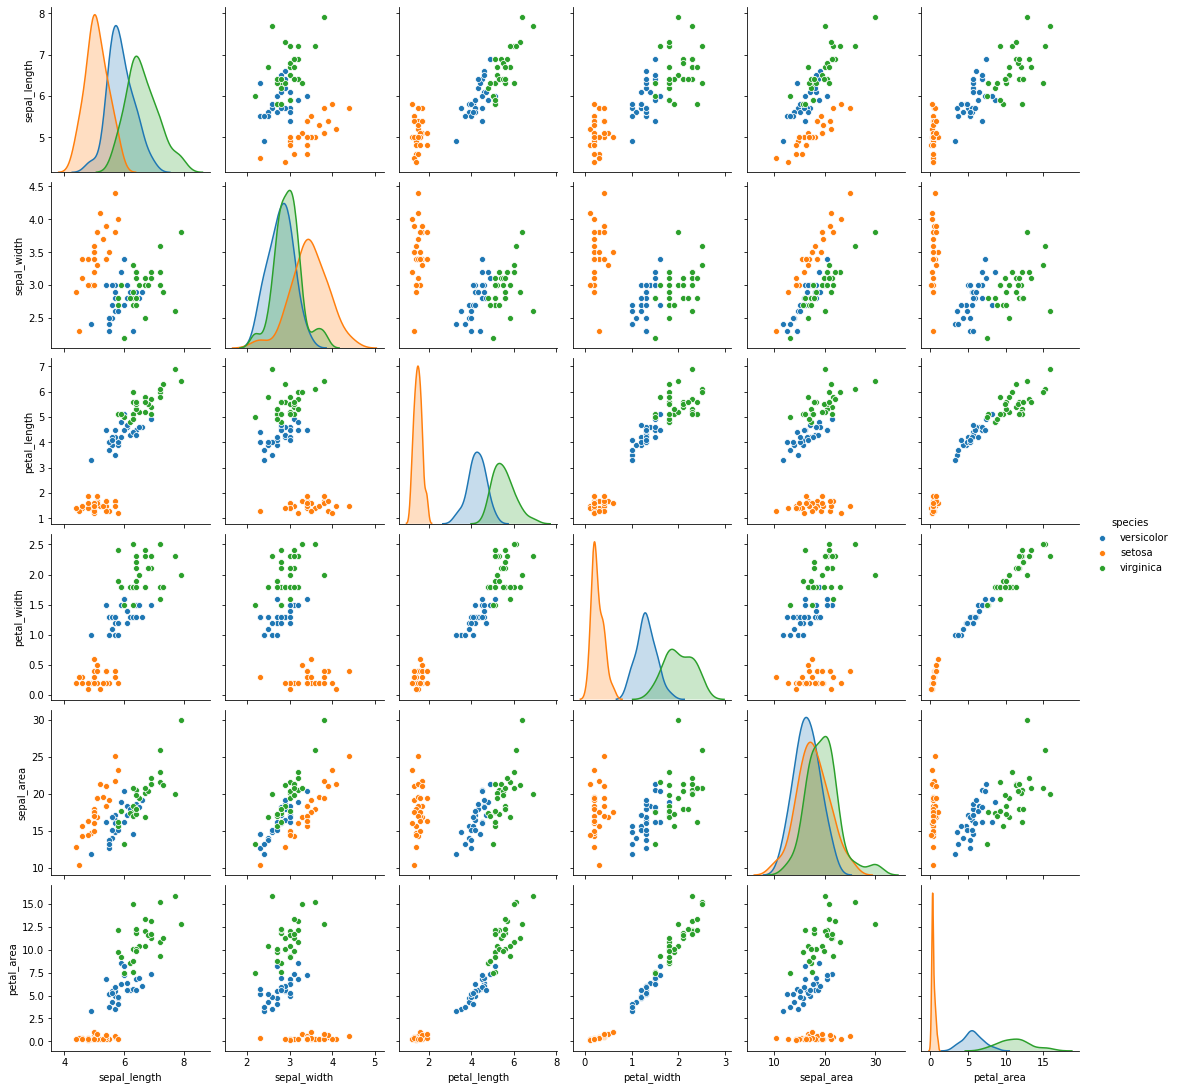

In [49]:
#creating another scatter matrix using seaborns,
#identifying data by species using color
sns.pairplot(train, hue = 'species')
plt.show()

### Exercise 6: 
- Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

__A. Plot Distribution__

In [50]:
#creating variables to use to distinguish variance
virginica_sep_len = train[train.species == 'virginica'].sepal_length
versicolor_sep_len = train[train.species == 'versicolor'].sepal_length

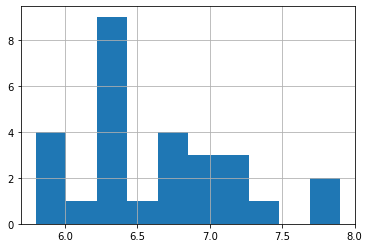

In [51]:
#creating a histogram for virginica sepal length
virginica_sep_len.hist()
plt.show()

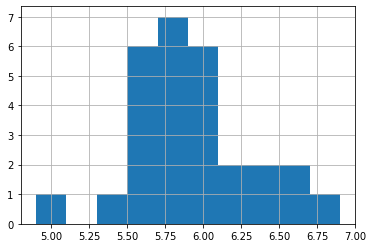

In [52]:
#creating a histogram for versicolor sepal length
versicolor_sep_len.hist()
plt.show()

__B. Set Hypothesis__

$H_0$: sepal length of virginica == sepal length of versicolor

$H_a$: sepal length of virginica != sepal length of versicolor

__C. Set Alpha__

In [53]:
alpha = .05

__D. Verify Assumptions__

- normal distribution: YES
- large enough: YES
- variance: ??

In [54]:
#checking variance
train.groupby('species').sepal_length.var()

species
setosa        0.129881
versicolor    0.181098
virginica     0.283426
Name: sepal_length, dtype: float64

- variance: NO

In [55]:
#performing 2 sample t-test with unequal variance
t, p = stats.ttest_ind(virginica_sep_len, versicolor_sep_len, equal_var = False)
t, p

(5.656491804882077, 6.856736413800083e-07)

In [56]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")

We reject the null hypothesis


- What is your takeaway from this statistical testing?

__Conclusion__: We reject the null hypothesis meaning that the sepal length of the virginica is significantly different than the sepal length of the versicolor. 

### Exercise 7: 
- Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

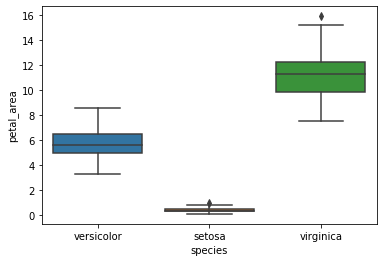

In [61]:
#creating a boxplot for petal area
sns.boxplot(data = train, y = 'petal_area', x = 'species')
#creating a boxplot for petal areaplt.show()

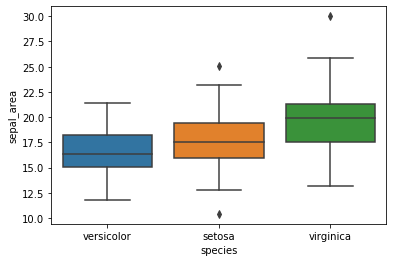

In [62]:
#creating a boxplot for sepal area
sns.boxplot(data = train, y = 'sepal_area', x = 'species')
plt.show()